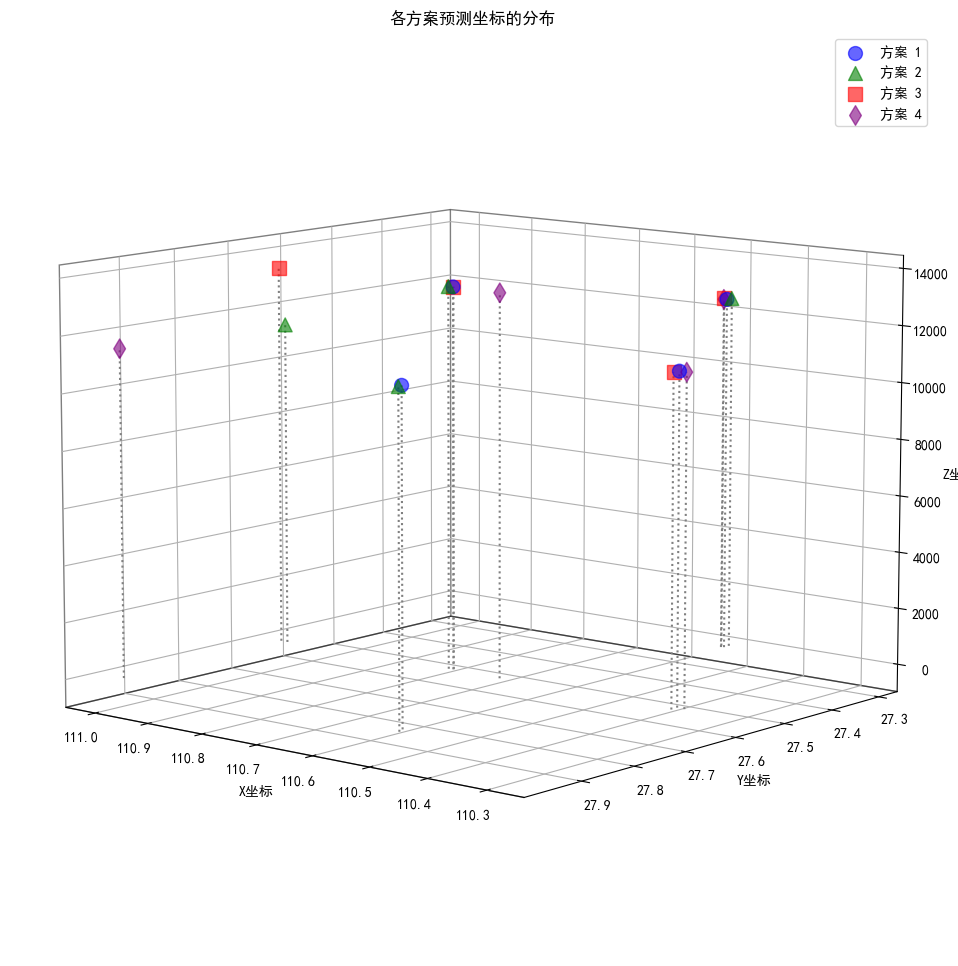

In [4]:
# 该图为第(2)问设备为6时的4种方案预测出的音爆点图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
import numpy as np

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 各方案中预测坐标的散点图
coords_scheme1 = [(110.7, 27.65, 13467.88), (110.5, 27.31, 12511.81), (110.5, 27.95, 11528.45), (110.3, 27.65, 11476.66)]
coords_scheme2 = [(110.5, 27.32, 0.0), (110.5, 27.95, 10403.42), (110.7, 27.65, 14012.57), (110.3, 27.65, 0.0)]
coords_scheme3 = [(110.7, 27.65, 13468.04), (110.3, 27.65, 11478.44), (110.5, 27.93, 891.87), (110.5, 27.3, 0.0)]
coords_scheme4 = [(110.7, 27.65, 13468.16), (110.5, 27.94, 0.0), (110.5, 27.35, 929.53), (110.3, 27.66, 0.0)]

coords_scheme5 = [(110.50, 27.95, 11512.66), (110.50, 27.31, 12514.40), (110.70, 27.65, 13469.49), (110.30, 27.65, 11475.63)]
coords_scheme6 = [(110.70, 27.65, 13468.37), (110.50, 27.31, 12513.98), (110.50, 27.95, 11528.86), (111.00, 27.65, 11478.44)]
coords_scheme7 = [(110.50, 27.31, 12513.86), (110.30, 27.65, 11477.62), (111.00, 27.65, 13468.22), (110.70, 27.65, 13468.21)]
coords_scheme8 = [(110.60, 27.65, 13468.07), (110.50, 27.31, 12513.89), (111.00, 27.95, 11529.34), (110.30, 27.65, 11478.43)]

# 添加较小的随机扰动以分开重叠的点
def add_noise(coords, noise_level=0.01):
    noisy_coords = [(x + np.random.uniform(-noise_level, noise_level),
                     y + np.random.uniform(-noise_level, noise_level),
                     z + np.random.uniform(-noise_level, noise_level)) for x, y, z in coords]
    return noisy_coords

coords_scheme1 = add_noise(coords_scheme1, noise_level=0.01)
coords_scheme2 = add_noise(coords_scheme2, noise_level=0.01)
coords_scheme3 = add_noise(coords_scheme3, noise_level=0.01)
coords_scheme4 = add_noise(coords_scheme4, noise_level=0.01)

coords_scheme5 = add_noise(coords_scheme5, noise_level=0.01)
coords_scheme6 = add_noise(coords_scheme6, noise_level=0.01)
coords_scheme7 = add_noise(coords_scheme7, noise_level=0.01)
coords_scheme8 = add_noise(coords_scheme8, noise_level=0.01)

# 将所有坐标聚合
# all_coords = [coords_scheme1, coords_scheme2, coords_scheme3, coords_scheme4]
all_coords = [coords_scheme5, coords_scheme6, coords_scheme7, coords_scheme8]
schemes = ['方案 1', '方案 2', '方案 3', '方案 4']
markers = ['o', '^', 's', 'd', 'p', '*', 'x', 'h']

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'green', 'red', 'purple']
for i, coords in enumerate(all_coords):
    xs, ys, zs = zip(*coords)
    ax.scatter(xs, ys, zs, c=colors[i], label=schemes[i], s=100, alpha=0.6, marker=markers[i])  # 使用不同形状的标记
    # 添加虚线连接每个点到z轴
    for x, y, z in coords:
        ax.plot([x, x], [y, y], [0, z], linestyle='dotted', color='gray')

# 增加立体感
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

# 设置不同的视角
ax.view_init(elev=10., azim=130)  # 调整视角

ax.set_xlabel('X坐标')
ax.set_ylabel('Y坐标')
ax.set_zlabel('Z坐标')
ax.set_title('各方案预测坐标的分布')
ax.legend()
plt.show()

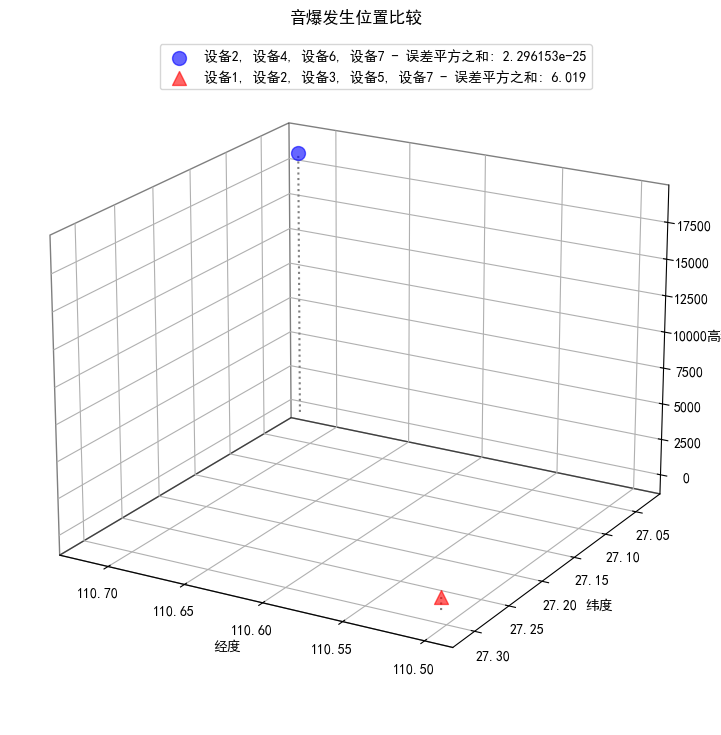

In [64]:
# 第(1)问，单残骸在观测设备数量为4，5情况下的最优解的对比图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 数据
data = [
    {'设备组合': '设备2, 设备4, 设备6, 设备7', '经度': 110.716401, '纬度': 27.029696, '高程': 18662.747, '时间': -38.033, '误差平方之和': 2.296153e-25},
    {'设备组合': '设备1, 设备2, 设备3, 设备5, 设备7', '经度': 110.498902, '纬度': 27.310517, '高程': 854.803, '时间': 19.313, '误差平方之和': 6.019}
]

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# 绘制数据点
colors = ['blue', 'red']
markers = ['o', '^']
for i, point in enumerate(data):
    ax.scatter(point['经度'], point['纬度'], point['高程'], color=colors[i], s=100, alpha=0.6, marker=markers[i], label=f"{point['设备组合']} - 误差平方之和: {point['误差平方之和']}")
    # 添加虚线连接每个点到z轴
    ax.plot([point['经度'], point['经度']], [point['纬度'], point['纬度']], [0, point['高程']], linestyle='dotted', color='gray')

# 增加立体感
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

# 设置不同的视角
ax.view_init(elev=20., azim=120)  # 调整视角

ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_zlabel('高程')
ax.set_title('音爆发生位置比较')
# 调整图例位置
ax.legend(loc='right', bbox_to_anchor=(0.85, 0.95))

plt.show()
